In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))
suppressMessages(library(ComplexHeatmap))
library(colorRamp2)

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_endothelial", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
proj <- addUMAP(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "UMAP_Endothelial",
    nNeighbors = 45,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

09:22:26 UMAP embedding parameters a = 1.75 b = 0.8421

09:22:26 Read 15757 rows and found 29 numeric columns

09:22:26 Using Annoy for neighbor search, n_neighbors = 45

09:22:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:22:28 Writing NN index file to temp file /tmp/RtmpC7V2l7/file1c52003f77e6d0

09:22:28 Searching Annoy index using 48 threads, search_k = 4500

09:22:28 Annoy recall = 100%

09:22:29 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 45

09:22:31 Initializing from normalized Laplacian + noise (using RSpectra)

09:22:31 Commencing optimization for 200 epochs, with 1094814 positive edges

09:22:31 Using rng type: pcg

09:22:43 Optimization finished

09:22

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c52002cdb351f-Date-2025-04-08_Time-09-22-45.795067.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c52002cdb351f-Date-2025-04-08_Time-09-22-45.795067.log



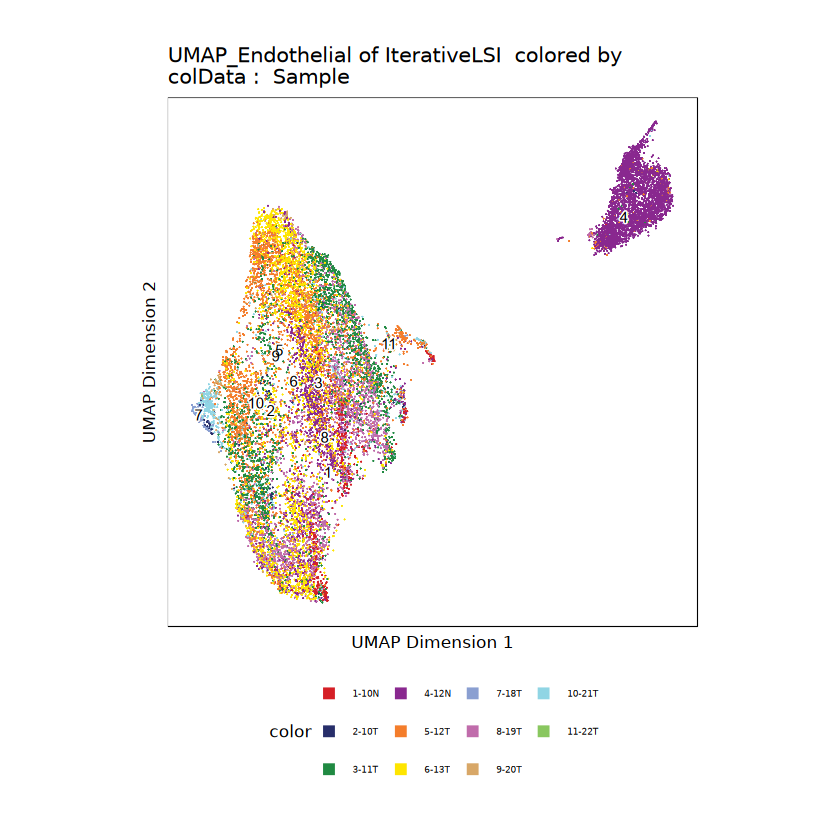

In [5]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Endothelial"
    )
p1

In [ ]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    groupBy = "Sample",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
    )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-13c48a75ed3cd5-Date-2025-04-02_Time-09-32-00.911656.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2025-04-02 09:32:01.23569 : Matching Known Biases, 0.004 mins elapsed.

###########
2025-04-02 09:34:04.157974 : Completed Pairwise Tests, 2.053 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-13c48a75ed3cd5-Date-2025-04-02_Time-09-32-00.911656.log



In [ ]:
saveRDS(markersGS, file = "./ArchRProject_endothelial/markersGS_EndothelialSample.rds")

In [ ]:
markersGS <- readRDS(file = "./ArchRProject_endothelial/markersGS_EndothelialSample.rds")

In [18]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    groupBy = "neoadjuvant",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
    )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-71d78123a515e-Date-2025-04-08_Time-02-44-01.097532.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2025-04-08 02:44:01.415945 : Matching Known Biases, 0.004 mins elapsed.

###########
2025-04-08 02:46:07.125369 : Completed Pairwise Tests, 2.099 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-71d78123a515e-Date-2025-04-08_Time-02-44-01.097532.log



In [22]:
saveRDS(markersGS, file = "./ArchRProject_endothelial/markersGS_Endothelial_neo.rds")

In [ ]:
markerPK <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix", 
    groupBy = "Sample",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-13c48aa229577-Date-2025-04-02_Time-09-44-08.875907.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-04-02 09:44:09.54088 : Matching Known Biases, 0.01 mins elapsed.

###########
2025-04-02 09:45:50.959964 : Completed Pairwise Tests, 1.7 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-13c48aa229577-Date-2025-04-02_Time-09-44-08.875907.log



In [ ]:
saveRDS(markerPK, file = "./ArchRProject_endothelial/markersPK_EndothelialSample.rds")

In [ ]:
markerPK <- readRDS(file = "./ArchRProject_endothelial/markersPK_EndothelialSample.rds")

In [16]:
markerPK <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix", 
    groupBy = "neoadjuvant",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-71d7829021db7-Date-2025-04-08_Time-02-42-10.004379.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-04-08 02:42:10.59792 : Matching Known Biases, 0.009 mins elapsed.

###########
2025-04-08 02:43:48.083464 : Completed Pairwise Tests, 1.633 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-71d7829021db7-Date-2025-04-08_Time-02-42-10.004379.log



In [17]:
saveRDS(markerPK, file = "./ArchRProject_endothelial/markersPK_Endothelial_neo.rds")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-71d7838dfe81b-Date-2025-04-07_Time-13-51-25.705352.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-04-07 13:51:25.970487 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-71d7838dfe81b-Date-2025-04-07_Time-13-51-25.705352.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


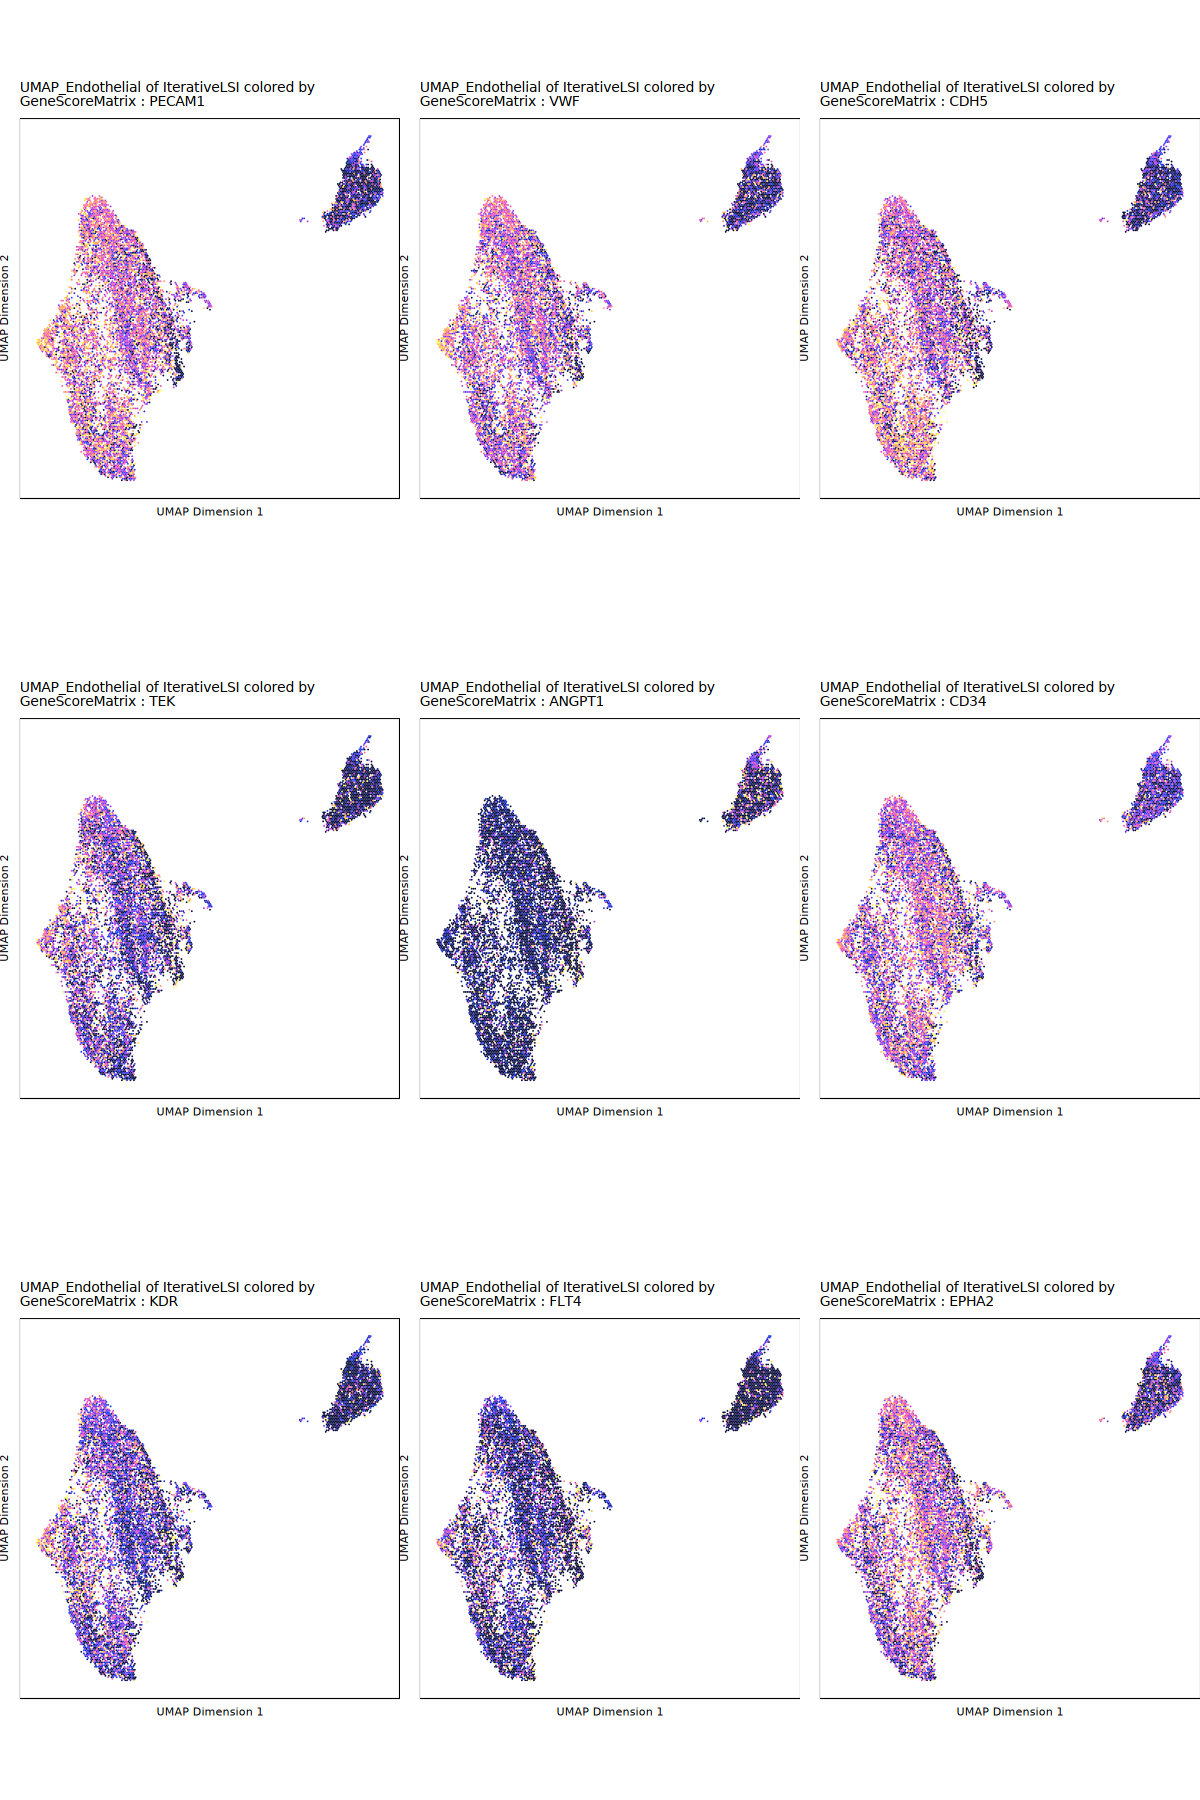

In [10]:
markerGenes <- c(
    "PECAM1", "VWF", "CDH5", # 结构蛋白
   "TEK", "ANGPT1", "CD34", # 稳定血管功能
   "KDR", "FLT4", "EPHA2"# 促血管生成 
   
)
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Endothelial",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

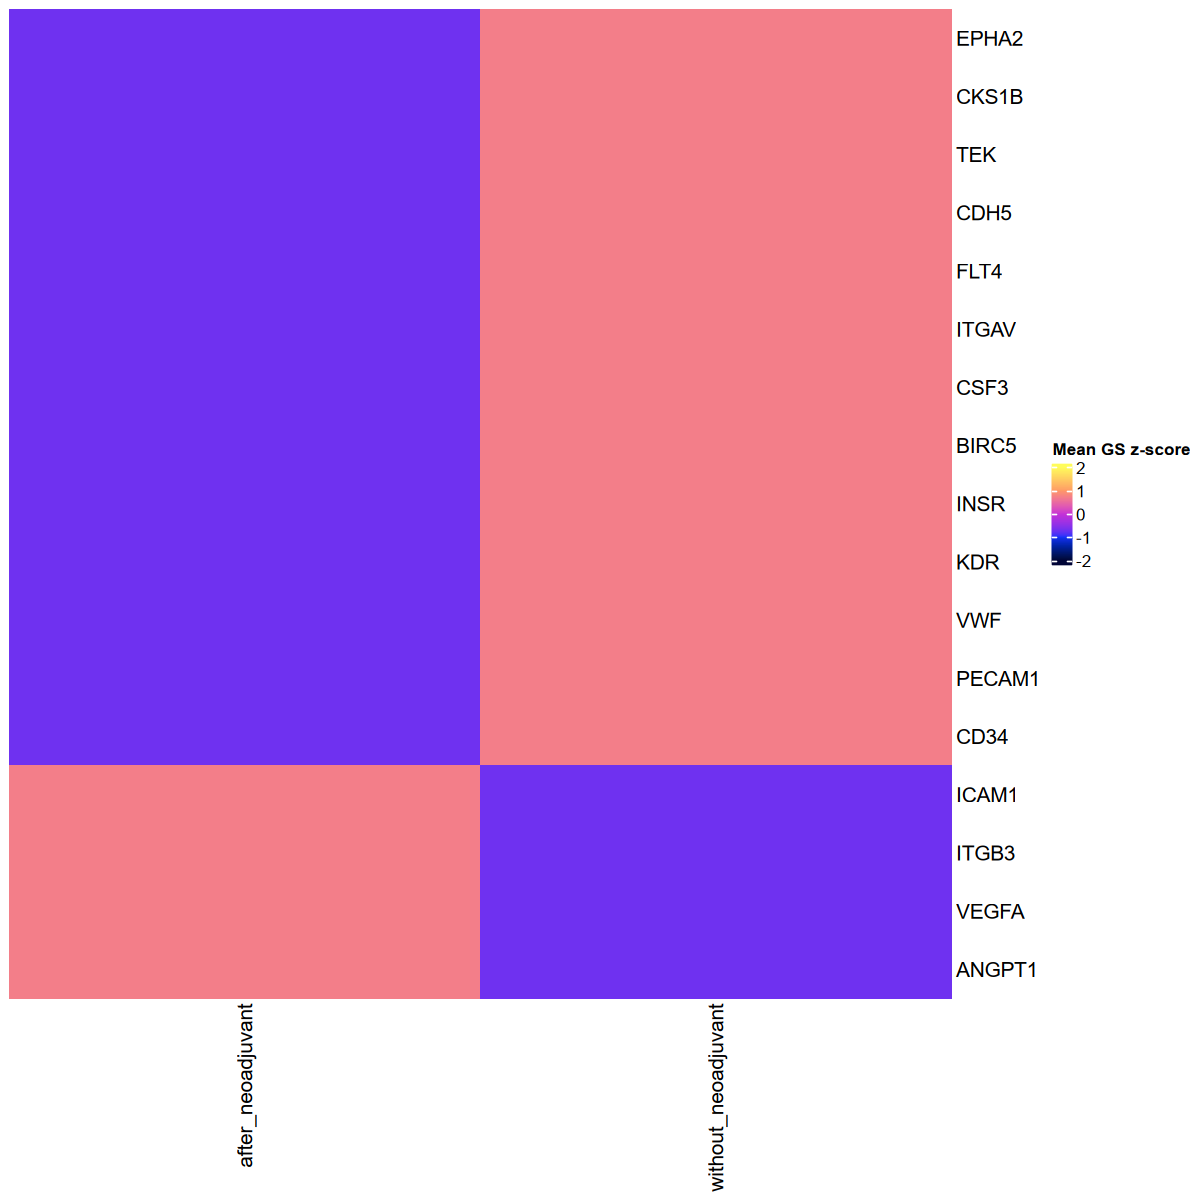

In [ ]:
markerGenes <- c(
   "PECAM1", "VWF", "CDH5", # 结构蛋白
   "TEK", "ANGPT1", "CD34", # 稳定血管功能
   "KDR", "FLT4", "EPHA2", "VEGFA", # 促血管生成 
   "H1F1A", "CSF3", # 代谢及缺氧响应
   "CD105", "ITGAV", "ITGB3","TEM1", "TEM9", "TEM17", # 细胞表面标记
   "INSR", "ICAM1","BIRC5", "CKS1B"
)

## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数de
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

DataFrame with 6 rows and 6 columns
    seqnames       idx              name combinedVars combinedMeans      rank
       <Rle> <integer>       <character>    <numeric>     <numeric> <integer>
f87        z        87 FOXA1.Forkhead_87      68.3331   -0.65523535         1
f86        z        86     Fosl2.bZIP_86      64.1998    0.00507140         2
f1         z         1       AP.1.bZIP_1      63.3041    0.02254696         3
f99        z        99      Fra2.bZIP_99      62.8903    0.00733377         4
f94        z        94 FOXM1.Forkhead_94      62.5174   -0.64134957         5
f88        z        88 FOXA1.Forkhead_88      61.6128   -0.63294138         6


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-71d782df79633-Date-2025-04-08_Time-02-49-30.932186.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

2025-04-08 02:49:31.257383 : Matching Known Biases, 0.004 mins elapsed.

###########
2025-04-08 02:49:37.579892 : Completed Pairwise Tests, 0.109 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-71d782df79633-Date-2025-04-08_Time-02-49-30.932186.log

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


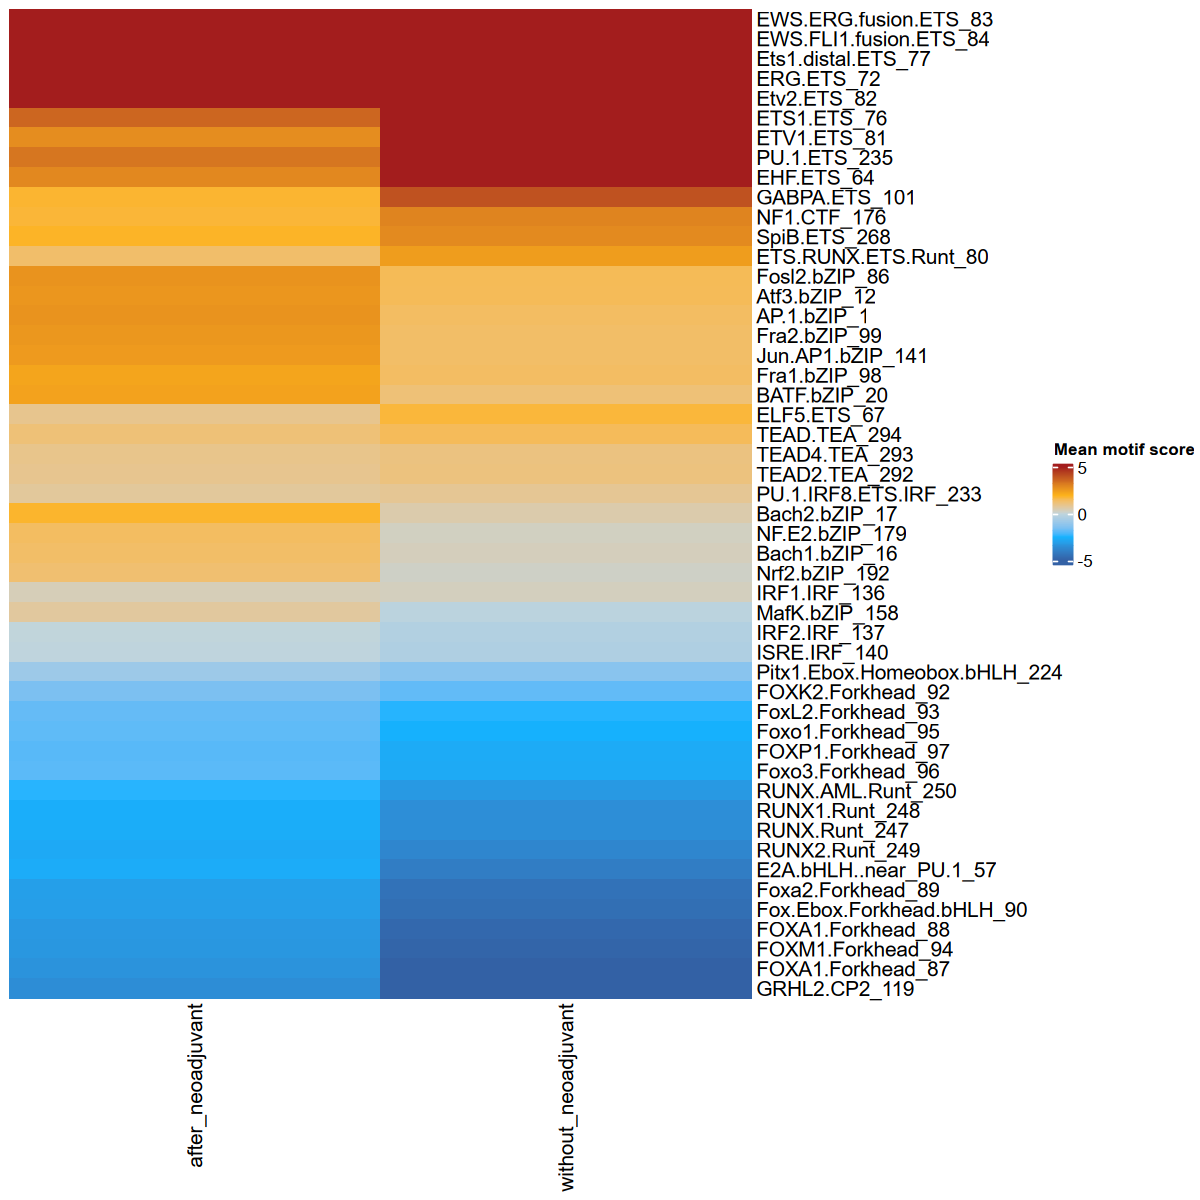

In [21]:
### motif enrichment
VarMotifs <- getVarDeviations(proj, name = "homerMatrix", plot = F)
MotifScoreClusters <- getMarkerFeatures(proj, 
                                        useMatrix = "homerMatrix", 
                                        groupBy = "neoadjuvant",
                                        bias = c("TSSEnrichment", "log10(nFrags)"),
                                        testMethod = "wilcoxon", 
                                        useSeqnames = "z")

fh <- function(x) hclust(dist(x), method="ward.D2")
idy <- which(mcols(MotifScoreClusters)$name %in% VarMotifs$name[c(1:50)])
mtx2 <- assays(MotifScoreClusters[idy,])$Mean %>% `rownames<-`(., mcols(MotifScoreClusters)$name[idy])

col_fun2 <- colorRamp2(c(-5,-2.5,0,2,5), paletteContinuous(set = "solarExtra", n = 5))
ht2 <- Heatmap(mtx2, name = "Mean motif score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun2)
options(repr.plot.width=10, repr.plot.height=10)
p6 <- draw(ht2)

In [7]:
markerGSList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >=1")

In [8]:
# 通过循环为每个聚类筛选前 500 个基因并生成单独的文件
for (cell_type in names(markerGSList)) {
df <- markerGSList[[cell_type]] # 提取当前聚类的数据框
df_sorted <- df[order(-df$Log2FC), ] # 按 Log2FC 降序排序
top_genes <- df_sorted$name[1:min(500, nrow(df_sorted))] # 取前 500 个基因名称

# 写入表头
write("Gene", file = paste0("./output/output_marker/endothelail/", cell_type, ".txt"))

con <- file(paste0("./output/output_marker/endothelail/", cell_type, ".txt"), "a")

# 将基因列表写入文本文件，每行一个基因
writeLines(top_genes, con)
close(con)
}

# 提示所有操作完成

In [37]:
gene_list <- c("VEGFA", "KDR", "FLT1", "COL4A1", "CSF3", "CCL2", "ICAM1", "VWF", "BCL2")

p <- plotBrowserTrack(
    ArchRProj = proj,
    groupBy = "neoadjuvant",
    geneSymbol = gene_list, 
    upstream = 50000,
    downstream = 50000
)

plotPDF(p, name = "Endothelial_track",ArchRProj = proj, addDOC = FALSE)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-84e42e141000-Date-2025-04-27_Time-06-37-24.302852.log
If there is an issue, please report to github with logFile!

2025-04-27 06:37:24.390659 : Validating Region, 0.001 mins elapsed.



GRanges object with 9 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr6   43770184-43786487      + |        7422       VEGFA
  [2]     chr4   55078477-55125589      - |        3791         KDR
  [3]    chr13   28300344-28495128      - |        2321        FLT1
  [4]    chr13 110148963-110307149      - |        1282      COL4A1
  [5]    chr17   40015361-40017813      + |        1440        CSF3
  [6]    chr17   34255285-34257203      + |        6347        CCL2
  [7]    chr19   10270835-10286615      + |        3383       ICAM1
  [8]    chr12     5948874-6124770      - |        7450         VWF
  [9]    chr18   63123346-63320128      - |         596        BCL2
  -------
  seqinfo: 24 sequences from hg38 genome


2025-04-27 06:37:24.463342 : Adding Bulk Tracks (1 of 9), 0.003 mins elapsed.

2025-04-27 06:37:34.253795 : Adding Feature Tracks (1 of 9), 0.166 mins elapsed.

2025-04-27 06:37:34.348336 : Adding Gene Tracks (1 of 9), 0.167 mins elapsed.

2025-04-27 06:37:34.632457 : Plotting, 0.172 mins elapsed.

2025-04-27 06:37:35.165151 : Adding Bulk Tracks (2 of 9), 0.181 mins elapsed.

2025-04-27 06:37:48.040774 : Adding Feature Tracks (2 of 9), 0.396 mins elapsed.

2025-04-27 06:37:48.114504 : Adding Gene Tracks (2 of 9), 0.397 mins elapsed.

2025-04-27 06:37:48.459386 : Plotting, 0.403 mins elapsed.

2025-04-27 06:37:48.935047 : Adding Bulk Tracks (3 of 9), 0.411 mins elapsed.

2025-04-27 06:37:50.926415 : Adding Feature Tracks (3 of 9), 0.444 mins elapsed.

2025-04-27 06:37:51.000378 : Adding Gene Tracks (3 of 9), 0.445 mins elapsed.

2025-04-27 06:37:51.298765 : Plotting, 0.45 mins elapsed.

2025-04-27 06:37:51.897314 : Adding Bulk Tracks (4 of 9), 0.46 mins elapsed.

2025-04-27 06:37:53.146

NULL
_msg_send errno: 4 strerror: Interrupted system call


Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



In [16]:
# 差异，motif分析
withoutMotif <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "MotifMatrix",
    groupBy = "neoadjuvant",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-84e4249d61739-Date-2025-04-27_Time-06-18-50.387699.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-27 06:18:50.539949 : 

2025-04-27 06:18:50.544048 : Matching Known Biases, 0.001 mins elapsed.

2025-04-27 06:18:50.77752 : Computing Pairwise Tests (1 of 1), 0.005 mins elapsed.

Pairwise Test without_neoadjuvant : Seqnames deviations

###########
2025-04-27 06:19:00.111904 : Completed Pairwise Tests, 0.161 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-84e4249d61739-Date-2025-04-27_Time-06-18-50.387699.log



In [22]:
withoutMotifResult <- getMarkers(withoutMotif, cutOff = "FDR <= 0.05")[[1]]
withoutMotifResult <- as.data.frame(withoutMotifResult)

In [23]:
top5_positive <- withoutMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:30)
top5_positive$name

[1] "SOX13_761"           "SOX9_756"            "ETV2_324"           
 [4] "AR_689"              "CTCF_177"            "MEF2A_639"          
 [7] "SOX12_768"           "RFX3_723"            "MEF2D_642"          
[10] "AC0021266_638"       "MEF2B_643"           "SOX5_758"           
[13] "SOX6_868"            "MEF2C_640"           "RFX4_725"           
[16] "SOX30_747"           "ENSG00000235187_346" "ERG_339"            
[19] "SOX11_767"           "NR3C1_666"           "SIX5_540"           
[22] "CTCFL_198"           "SOX4_754"            "NFIX_738"           
[25] "ERF_325"             "RFX8_730"            "TAL1_62"            
[28] "TAL2_822"            "PGR_660"             "RFX2_724"

In [24]:
top5_negative <- withoutMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:30)
top5_negative$name

[1] "JUND_124"    "JUNB_139"    "SMARCC1_651" "FOSL2_105"   "FOSL1_142"  
 [6] "FOS_137"     "BACH2_113"   "JUN_143"     "BACH1_130"   "FOSB_121"   
[11] "RELA_722"    "JDP2_125"    "PDX1_482"    "REL_721"     "NFE2_119"   
[16] "NOTO_567"    "EVX2_534"    "EMX1_474"    "NFE2L2_115"  "BATF_129"   
[21] "NFKB2_714"   "EVX1_419"    "EMX2_525"    "NFKB1_719"   "GRHL1_391"  
[26] "STAT5B_779"  "STAT5A_774"  "PAX4_607"    "VSX2_442"    "RELB_718"

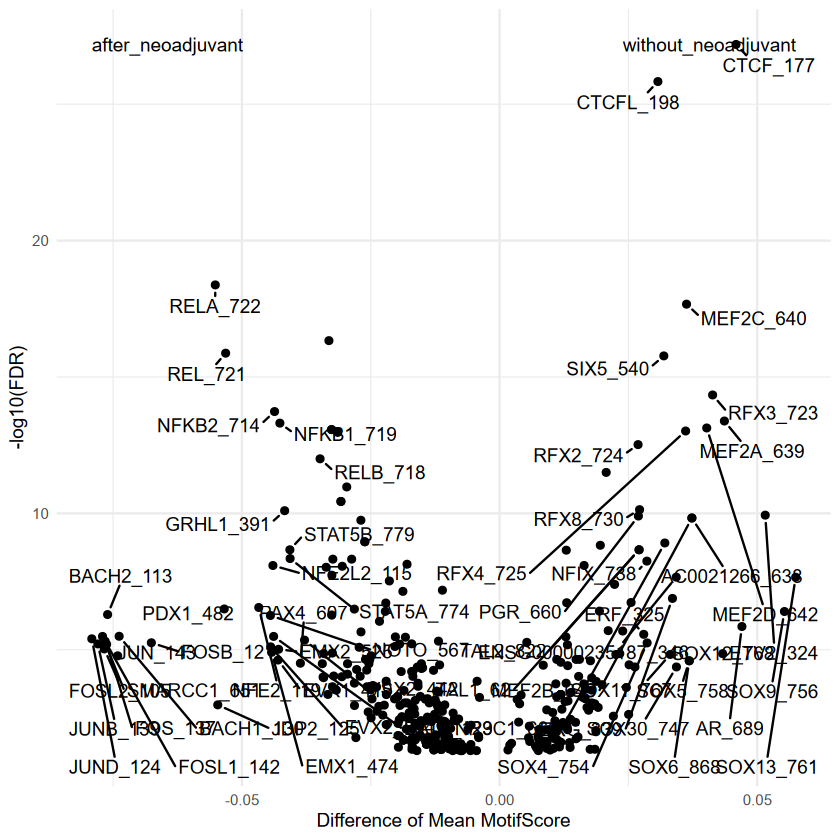

In [25]:
# MeanDiff > 0 表示 without_neoadjuvant 组的得分高于 after_neoadjuvant 组（图中靠右）。
# MeanDiff < 0 表示 after_neoadjuvant 组的得分高于 without_neoadjuvant 组（图中靠左）。
# 基本火山图
p <- ggplot(withoutMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- withoutMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:30)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- withoutMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:30)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000  # 增加最大重叠次数

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(withoutMotifResult$MeanDiff), y = max(-log10(withoutMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(withoutMotifResult$MeanDiff), y = max(-log10(withoutMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)

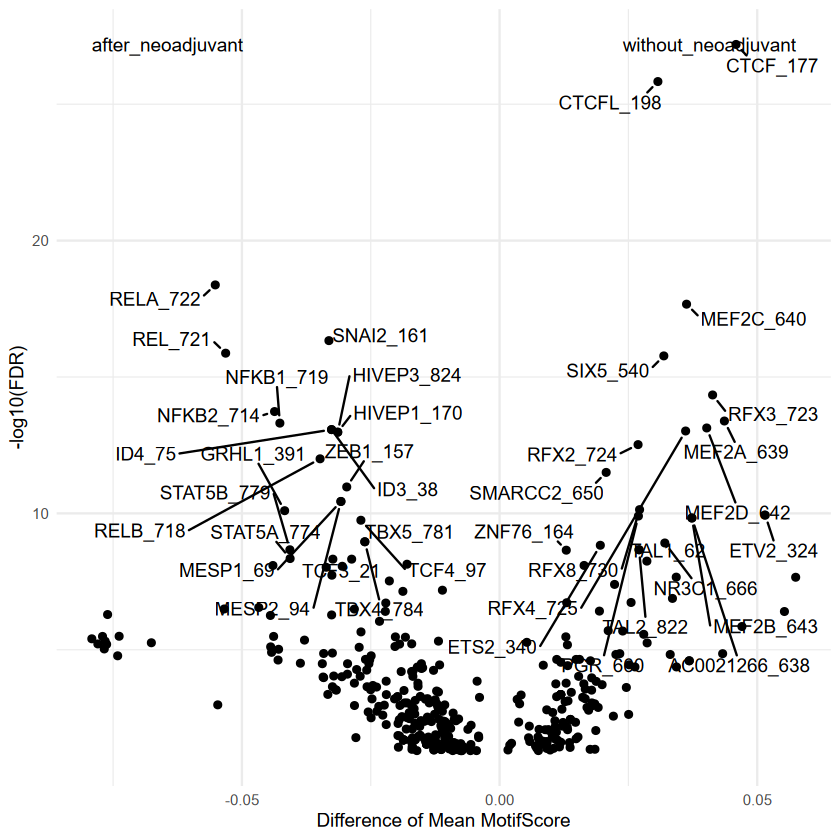

In [36]:
p <- ggplot(withoutMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 筛选 MeanDiff > 0 的点（without_neoadjuvant 组高表达），按 FDR 排序取前五
top5_without <- withoutMotifResult %>% 
  filter(MeanDiff > 0) %>% 
  arrange(FDR) %>% 
  dplyr::slice(1:20)

# 筛选 MeanDiff < 0 的点（after_neoadjuvant 组高表达），按 FDR 排序取前五
top5_after <- withoutMotifResult %>% 
  filter(MeanDiff < 0) %>% 
  arrange(FDR) %>% 
  dplyr::slice(1:20)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_without, top5_after)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000  # 增加最大重叠次数

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(withoutMotifResult$MeanDiff), y = max(-log10(withoutMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(withoutMotifResult$MeanDiff), y = max(-log10(withoutMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)

In [27]:
# 差异，motif分析
afterMotif <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "MotifMatrix",
    groupBy = "neoadjuvant",
    useGroups = "after_neoadjuvant", # 前景组
    bgdGroups = "without_neoadjuvant", # 背景组
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-84e4272bb5899-Date-2025-04-27_Time-06-24-32.231083.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-04-27 06:24:32.37483 : 

2025-04-27 06:24:32.378663 : Matching Known Biases, 0.001 mins elapsed.

2025-04-27 06:24:32.692073 : Computing Pairwise Tests (1 of 1), 0.007 mins elapsed.

Pairwise Test after_neoadjuvant : Seqnames deviations

###########
2025-04-27 06:24:41.207347 : Completed Pairwise Tests, 0.148 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-84e4272bb5899-Date-2025-04-27_Time-06-24-32.231083.log



In [28]:
afterMotifResult <- getMarkers(afterMotif, cutOff = "FDR <= 0.05")[[1]]
afterMotifResult <- as.data.frame(afterMotifResult)

In [38]:
top5_positive <- afterMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:30)
top5_positive$name

[1] "GRHL1_391"   "CEBPG_128"   "JUND_124"    "FOSL1_142"   "JUNB_139"   
 [6] "CEBPB_140"   "FOSL2_105"   "CEBPE_107"   "JUN_143"     "SMARCC1_651"
[11] "BACH1_130"   "BACH2_113"   "FOS_137"     "FOXA1_357"   "FOSB_121"   
[16] "CEBPD_152"   "CEBPA_155"   "NOTO_567"    "ZEB1_157"    "BATF_129"   
[21] "SNAI2_161"   "NFKB2_714"   "ATF4_122"    "STAT5A_774"  "ID3_38"     
[26] "ID4_75"      "RELA_722"    "TCF4_97"     "TEF_134"     "PAX4_607"

In [39]:
top5_negative <- afterMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:30)
top5_negative$name

[1] "SOX9_756"            "ETV2_324"            "SOX13_761"          
 [4] "SOX12_768"           "SOX5_758"            "SOX6_868"           
 [7] "ERG_339"             "SOX11_767"           "ERF_325"            
[10] "SOX30_747"           "RFX3_723"            "ENSG00000235187_346"
[13] "MEF2A_639"           "SOX3_759"            "RFX4_725"           
[16] "CTCF_177"            "FLI1_337"            "STAT6_776"          
[19] "MEF2D_642"           "ETS1_332"            "ELF2_326"           
[22] "ETV7_321"            "MEF2C_640"           "AC0021266_638"      
[25] "MEF2B_643"           "SOX14_765"           "TCF23_64"           
[28] "TAL1_62"             "TAL2_822"            "RFX2_724"

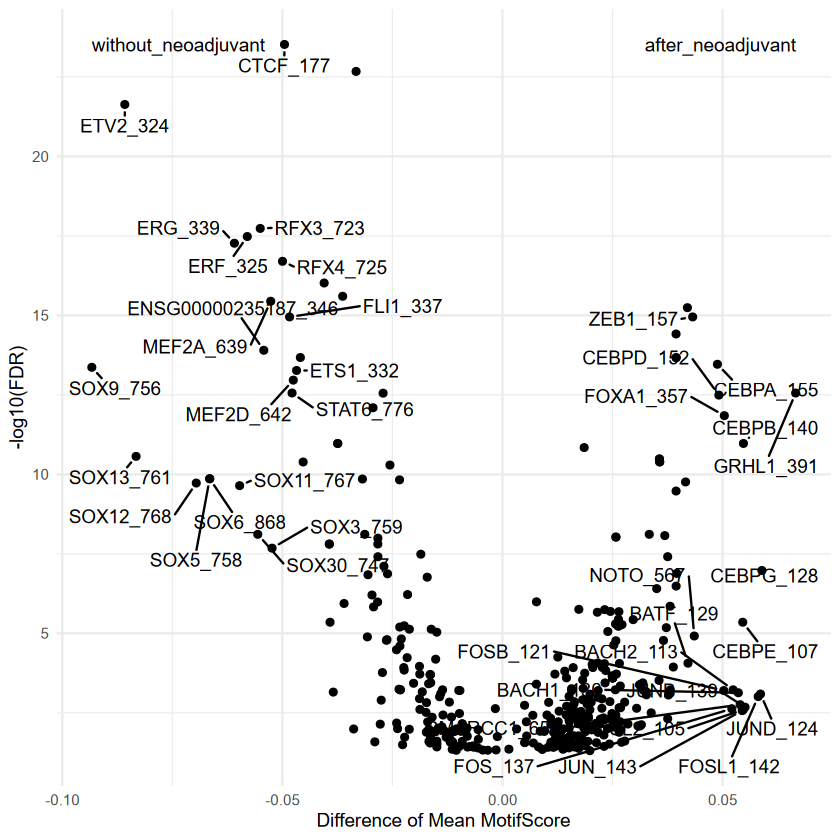

In [40]:
# MeanDiff > 0 表示 without_neoadjuvant 组的得分高于 after_neoadjuvant 组（图中靠右）。
# MeanDiff < 0 表示 after_neoadjuvant 组的得分高于 without_neoadjuvant 组（图中靠左）。
# 基本火山图
p <- ggplot(afterMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- afterMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:20)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- afterMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:20)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0, # 强制显示所有连线 
      max.overlaps = 3000  # 增加最大重叠次数

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(afterMotifResult$MeanDiff), y = max(-log10(afterMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 0) +
  annotate("text", x = max(afterMotifResult$MeanDiff), y = max(-log10(afterMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 1)

# 显示图形
print(p)

In [ ]:
# 治疗后比治疗前更开放的区域
markersPeak1 <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix",
    groupBy = "neoadjuvant"'SOX9_756''ETV2_324''SOX13_761''SOX12_768''SOX5_758''SOX6_868''ERG_339''SOX11_767''ERF_325''SOX30_747''RFX3_723''ENSG00000235187_346''MEF2A_639''SOX3_759''RFX4_725''CTCF_177''FLI1_337''STAT6_776''MEF2D_642''ETS1_332'

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-330adb2b6e121e-Date-2025-04-07_Time-11-37-44.332031.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Integer.Matrix

2025-04-07 11:37:45.055372 : Matching Known Biases, 0.011 mins elapsed.

2025-04-07 11:37:46.85217 : Computing Pairwise Tests (1 of 1), 0.041 mins elapsed.

Pairwise Test after_neoadjuvant : Seqnames chr1

Pairwise Test after_neoadjuvant : Seqnames chr10

Pairwise Test after_neoadjuvant : Seqnames chr11

Pairwise Test after_neoadjuvant : Seqnames chr12

Pairwise Test after_neoadjuvant : Seqnames chr13

Pairwise Test after_neoadjuvant : Seqnames chr14

Pairwise Test after_neoadjuvant : Seqnames chr15

Pairwise Test after_neoadjuvant : Seqnames chr16

Pairwise Test after_neoadjuvant : Seqnames chr17

Pairwise Test after_neoadjuvant : Seqnames chr18

Pairwise Test after_neoadjuvant : Seqnames chr19

Pairwise Test after_neoadjuvant : Seqnames chr2

Pairwise Test after_neoadjuvant : Seqnames chr20

Pairwise Test after_neoadjuvant : Seqnames chr21

Pairwise Test after_neoadjuvant : Seqnames chr22

Pairwise Test after_neoadjuvant : Seqnames chr3

Pairwise 

In [ ]:
markersPeak2 <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix",
    groupBy = "neoadjuvant",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-330adb2063adc0-Date-2025-04-07_Time-11-39-22.012007.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Integer.Matrix

2025-04-07 11:39:22.502545 : Matching Known Biases, 0.007 mins elapsed.

2025-04-07 11:39:24.393292 : Computing Pairwise Tests (1 of 1), 0.039 mins elapsed.

Pairwise Test without_neoadjuvant : Seqnames chr1

Pairwise Test without_neoadjuvant : Seqnames chr10

Pairwise Test without_neoadjuvant : Seqnames chr11

Pairwise Test without_neoadjuvant : Seqnames chr12

Pairwise Test without_neoadjuvant : Seqnames chr13

Pairwise Test without_neoadjuvant : Seqnames chr14

Pairwise Test without_neoadjuvant : Seqnames chr15

Pairwise Test without_neoadjuvant : Seqnames chr16

Pairwise Test without_neoadjuvant : Seqnames chr17

Pairwise Test without_neoadjuvant : Seqnames chr18

Pairwise Test without_neoadjuvant : Seqnames chr19

Pairwise Test without_neoadjuvant : Seqnames chr2

Pairwise Test without_neoadjuvant : Seqnames chr20

Pairwise Test without_neoadjuvant : Seqnames chr21

Pairwise Test without_neoadjuvant : Seqnames chr22

Pairwise Test without_neoad

In [ ]:
# markerList1 <- getMarkers(markersPeak1, cutOff = "FDR <= 0.05 & Log2FC >= 1")
# markerList2 <- getMarkers(markersPeak2, cutOff = "FDR <= 0.05 & Log2FC >= 1")
markerList1 <- getMarkers(markersPeak1)
markerList2 <- getMarkers(markersPeak2)

In [107]:
markerList1$after_neoadjuvant

DataFrame with 12 rows and 7 columns
       seqnames       idx     start       end    Log2FC         FDR  MeanDiff
          <Rle> <integer> <integer> <integer> <numeric>   <numeric> <numeric>
144317    chr17     15097  79213666  79214166   4.31414 6.46875e-06 0.1451395
145711    chr17     16491  83103521  83104021   1.83790 1.07396e-03 0.1925982
236768     chr4       335   1511614   1512114   1.67485 1.69371e-02 0.1786262
128912    chr16     11728  89192682  89193182   1.19072 1.79610e-02 0.2086457
141363    chr17     12143  66275586  66276086   1.93869 3.18545e-02 0.0854074
...         ...       ...       ...       ...       ...         ...       ...
327675     chr9      5456  87464313  87464813   2.25651   0.0490696 0.1168487
196830    chr20      3059  25750883  25751383   1.69675   0.0625782 0.0852556
247012     chr4     10579 127533214 127533714   1.28809   0.0626884 0.0869142
128901    chr16     11717  89171342  89171842   1.11456   0.0937183 0.2146401
213887    chr22      6096  

In [ ]:
markerList2$without_neoadjuvant

DataFrame with 853 rows and 7 columns
       seqnames       idx     start       end    Log2FC         FDR  MeanDiff
          <Rle> <integer> <integer> <integer> <numeric>   <numeric> <numeric>
151103    chr18      5346  57398188  57398688   3.99073 4.55146e-12  0.175074
168287     chr2      2586  20305285  20305785   6.01786 1.20501e-07  0.127594
33661     chr10       267   1631350   1631850   3.23573 1.50037e-06  0.132471
246777     chr4     10344 123616896 123617396   1.45446 8.04370e-06  0.237766
210301    chr22      2510  31046543  31047043   1.70552 2.46003e-05  0.264222
...         ...       ...       ...       ...       ...         ...       ...
209725    chr22      1934  28034651  28035151  0.965181   0.0998869 0.0588897
32059      chr1     32059 234970583 234971083  2.603517   0.0999213 0.0364809
121528    chr16      4344  27560616  27561116  1.891943   0.0999780 0.0391551
251351     chr4     14918 186651647 186652147  2.127577   0.0999780 0.0661589
252617     chr5      1091 

In [ ]:
# 提取 markerList1$after_neoadjuvant 的结果
stats1 <- data.frame(
  Peak = markerList1$after_neoadjuvant$idx,
  Log2FC = -markerList1$after_neoadjuvant$Log2FC,# 反转 Log2FC 的符号
  FDR = markerList1$after_neoadjuvant$FDR,
  Group = rep("after_neoadjuvant", nrow(markerList1$after_neoadjuvant)),
  seqnames = markerList1$after_neoadjuvant$seqnames,
  start = markerList1$after_neoadjuvant$start,
  end = markerList1$after_neoadjuvant$end
)

# 提取 markerList2$without_neoadjuvant 的结果
stats2 <- data.frame(
  Peak = markerList2$without_neoadjuvant$idx,
  Log2FC = markerList2$without_neoadjuvant$Log2FC,  
  FDR = markerList2$without_neoadjuvant$FDR,
  Group = rep("without_neoadjuvant", nrow(markerList2$without_neoadjuvant)),
  seqnames = markerList2$without_neoadjuvant$seqnames,
  start = markerList2$without_neoadjuvant$start,
  end = markerList2$without_neoadjuvant$end
)

In [101]:
# 合并数据
combined_stats <- rbind(stats1, stats2)

# 将 FDR 转换为 -log10(FDR) 以便绘图
combined_stats$negLog10FDR <- -log10(combined_stats$FDR)

# 标记显著性
combined_stats$Significance <- ifelse(
  combined_stats$FDR <= 0.05 & abs(combined_stats$Log2FC) >= 1,
  "Significant",
  "Not Significant"
)

In [102]:
# 分别找出两组中 FDR 最小的五个点
top_after <- stats1[order(stats1$FDR), ][1:5, ]
top_without <- stats2[order(stats2$FDR), ][1:5, ]

In [109]:
top_after

,Peak,Log2FC,FDR,Group,seqnames,start,end,negLog10FDR,Significance
,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,15097,-4.314137,6.468754e-06,after_neoadjuvant,chr17,79213666,79214166,5.189179,Significant
2,16491,-1.837896,1.073965e-03,after_neoadjuvant,chr17,83103521,83104021,2.969010,Significant
3,335,-1.674846,1.693712e-02,after_neoadjuvant,chr4,1511614,1512114,1.771160,Significant
4,11728,-1.190721,1.796096e-02,after_neoadjuvant,chr16,89192682,89193182,1.745670,Significant
5,12143,-1.938695,3.185452e-02,after_neoadjuvant,chr17,66275586,66276086,1.496829,Significant


In [108]:
top_without

,Peak,Log2FC,FDR,Group,seqnames,start,end,negLog10FDR,Significance
,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,5346,3.990734,4.551458e-12,without_neoadjuvant,chr18,57398188,57398688,11.341849,Significant
2,2586,6.017859,1.205013e-07,without_neoadjuvant,chr2,20305285,20305785,6.919008,Significant
3,267,3.235728,1.500369e-06,without_neoadjuvant,chr10,1631350,1631850,5.823802,Significant
4,10344,1.454457,8.043699e-06,without_neoadjuvant,chr4,123616896,123617396,5.094544,Significant
5,2510,1.705516,2.460034e-05,without_neoadjuvant,chr22,31046543,31047043,4.609059,Significant


In [104]:
top_after$negLog10FDR <- -log10(top_after$FDR)  
top_without$negLog10FDR <- -log10(top_without$FDR)  

# 标记显著性
top_after$Significance <- ifelse(
  top_after$FDR <= 0.05 & abs(top_after$Log2FC) >= 1,
  "Significant",
  "Not Significant"
)

top_without$Significance <- ifelse(
  top_without$FDR <= 0.05 & abs(top_without$Log2FC) >= 1,
  "Significant",
  "Not Significant"
)

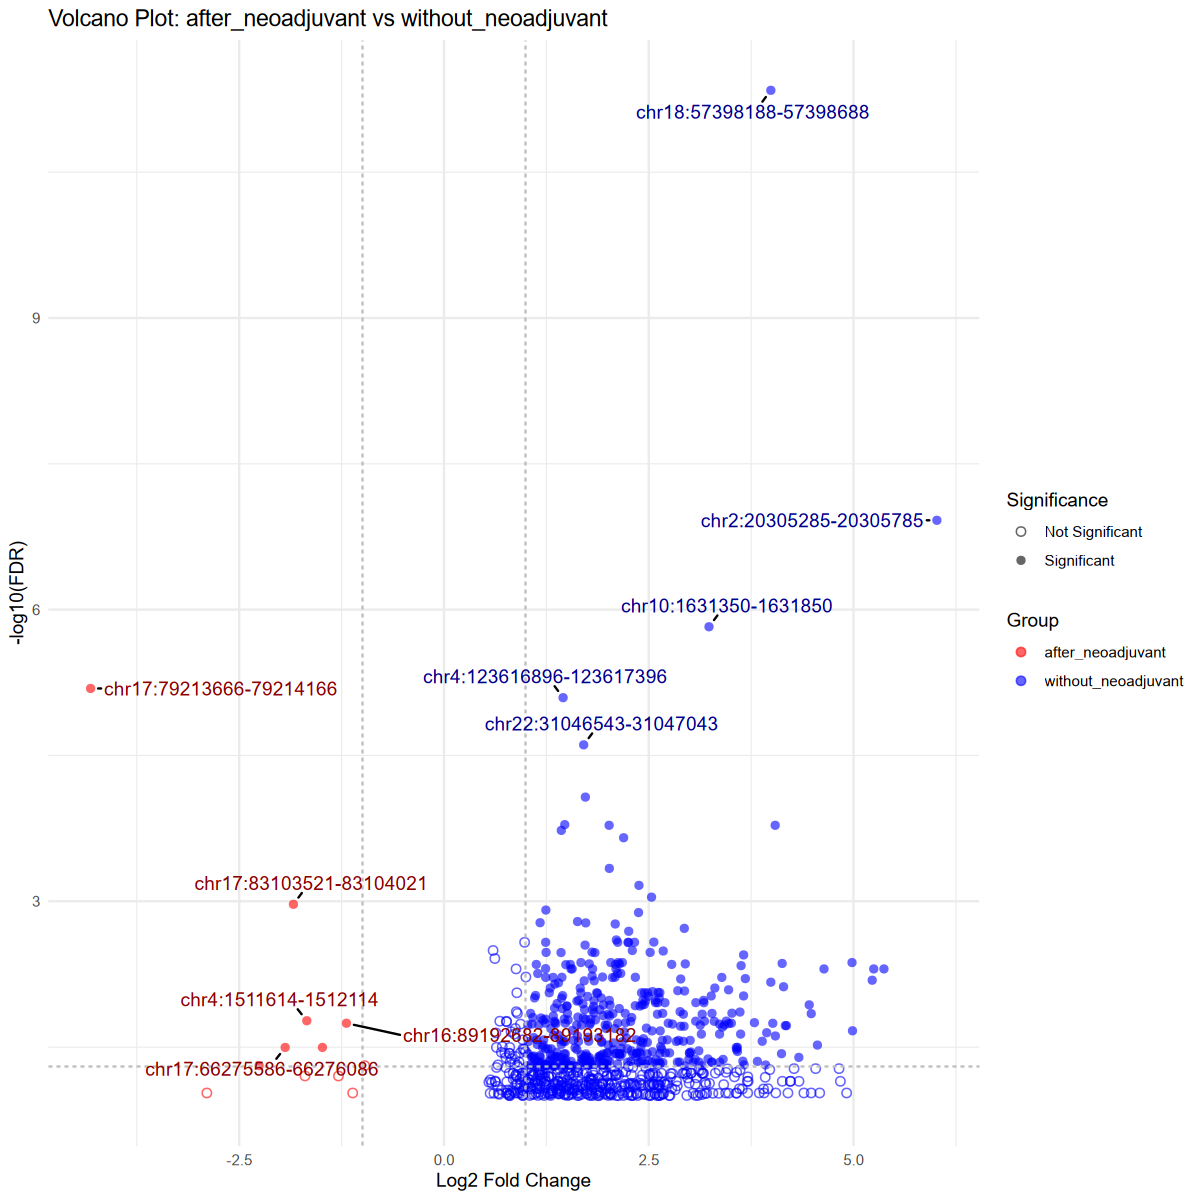

In [105]:
# 绘制火山图
p <- ggplot(combined_stats, aes(x = Log2FC, y = negLog10FDR, color = Group, shape = Significance)) +
  geom_point(alpha = 0.6, size = 2) +
  scale_color_manual(values = c("after_neoadjuvant" = "red", "without_neoadjuvant" = "blue")) +
  scale_shape_manual(values = c("Significant" = 16, "Not Significant" = 1)) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "gray") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "gray") +
  labs(
    x = "Log2 Fold Change",
    y = "-log10(FDR)",
    title = "Volcano Plot: after_neoadjuvant vs without_neoadjuvant"
  ) +
  theme_minimal() +
  theme(legend.position = "right")

# 添加标注
p <- p + geom_text_repel(
  data = top_after,
  aes(x = Log2FC, y = negLog10FDR, label = paste0(seqnames, ":", start, "-", end)),
  size = 4,
  box.padding = unit(0.5, "lines"),
  point.padding = unit(0.5, "lines"),
  segment.color = "black",
  color = "darkred",
  min.segment.length = 0, # 强制显示所有连线 
)

p <- p + geom_text_repel(
  data = top_without,
  aes(x = Log2FC, y = negLog10FDR, label = paste0(seqnames, ":", start, "-", end)),
  size = 4,
  box.padding = unit(0.5, "lines"),
  point.padding = unit(0.5, "lines"),
  segment.color = "black",
  color = "darkblue",
   min.segment.length = 0, # 强制显示所有连线 
)
# 显示图形
print(p)

In [55]:
markerTest <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix",
    groupBy = "neoadjuvant",
    useGroups = "after_neoadjuvant", # 前景组
    bgdGroups = "without_neoadjuvant", # 背景组
    testMethod = "wilcoxon",
    bias = c("TSSEnrichment", "log10(nFrags)")
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1c52007f89f840-Date-2025-04-08_Time-11-34-59.437172.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Integer.Matrix

2025-04-08 11:34:59.96796 : Matching Known Biases, 0.008 mins elapsed.

2025-04-08 11:35:01.70079 : Computing Pairwise Tests (1 of 1), 0.036 mins elapsed.

Pairwise Test after_neoadjuvant : Seqnames chr1

Pairwise Test after_neoadjuvant : Seqnames chr10

Pairwise Test after_neoadjuvant : Seqnames chr11

Pairwise Test after_neoadjuvant : Seqnames chr12

Pairwise Test after_neoadjuvant : Seqnames chr13

Pairwise Test after_neoadjuvant : Seqnames chr14

Pairwise Test after_neoadjuvant : Seqnames chr15

Pairwise Test after_neoadjuvant : Seqnames chr16

Pairwise Test after_neoadjuvant : Seqnames chr17

Pairwise Test after_neoadjuvant : Seqnames chr18

Pairwise Test after_neoadjuvant : Seqnames chr19

Pairwise Test after_neoadjuvant : Seqnames chr2

Pairwise Test after_neoadjuvant : Seqnames chr20

Pairwise Test after_neoadjuvant : Seqnames chr21

Pairwise Test after_neoadjuvant : Seqnames chr22

Pairwise Test after_neoadjuvant : Seqnames chr3

Pairwise T

Warning message:
“Removed 115 rows containing missing values or values outside the scale range
(`geom_point_rast()`).”


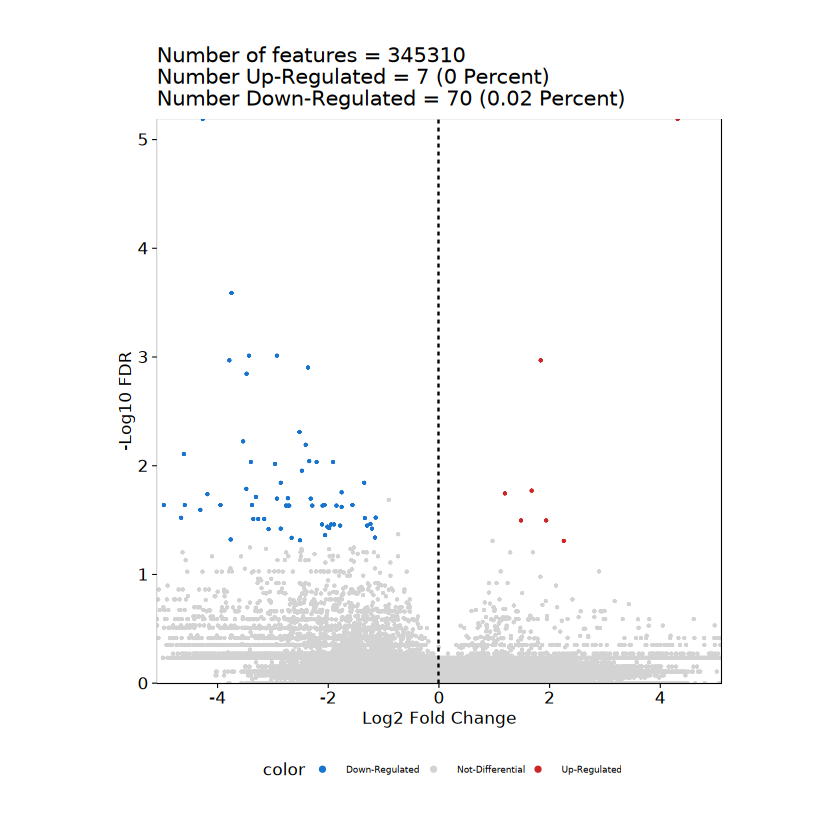

In [56]:
pv <- plotMarkers(seMarker = markerTest, name = "after_neoadjuvant", cutOff = "FDR <= 0.05 & abs(Log2FC) >= 1", plotAs = "Volcano")
pv

In [ ]:
markerTest <- getMarkers(markerTest)

In [9]:
motifPositions <- getPositions(ArchRProj = proj)
motifPositions 

GRangesList object of length 332:
$AP.1.bZIP_1
GRanges object with 67738 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       832379-832388      + |   9.05348
      [2]     chr1       967006-967015      - |   9.04335
      [3]     chr1     1006754-1006763      - |   9.55856
      [4]     chr1     1022065-1022074      + |   8.77324
      [5]     chr1     1022064-1022073      - |   9.14812
      ...      ...                 ...    ... .       ...
  [67734]     chrX 155334754-155334763      + |   9.64631
  [67735]     chrX 155334560-155334569      - |   9.04335
  [67736]     chrX 155334753-155334762      - |   9.55022
  [67737]     chrX 155888402-155888411      + |   9.77651
  [67738]     chrX 155888401-155888410      - |   9.40673
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<331 more elements>

In [19]:
motifs <- c("HOX", "MAF", "FOSL1", "TEAD1", "DLL4", "STAT1", "NFATC4", "PBX3", "TWIST1", "HNF1A", "HNF1B", "NFKB", "SOX")
markerMotifs <- unlist(lapply(motifs, function(x) grep(x, names(motifPositions), value = TRUE)))
markerMotifs

[1] "HOXA2.Homeobox_128"                      
[2] "HOXA9.Homeobox_129"                      
[3] "HOXB13.Homeobox_130"                     
[4] "HOXD13.Homeobox_133"                     
[5] "STAT1.Stat_273"                          
[6] "OCT4.SOX2.TCF.NANOG.POU.Homeobox.HMG_198"

In [22]:
proj <- addGroupCoverages(proj, groupBy = "neoadjuvant")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-2efbb674d6b372-Date-2025-04-14_Time-11-16-41.499072.log
If there is an issue, please report to github with logFile!

after_neoadjuvant (1 of 2) : CellGroups N = 5

without_neoadjuvant (2 of 2) : CellGroups N = 5

2025-04-14 11:16:45.588123 : Creating Coverage Files!, 0.068 mins elapsed.

2025-04-14 11:16:45.591886 : Batch Execution w/ safelapply!, 0.068 mins elapsed.

2025-04-14 11:16:45.61059 : Group after_neoadjuvant._.12T (1 of 10) : Creating Group Coverage File : after_neoadjuvant._.12T.insertions.coverage.h5, 0.069 mins elapsed.

Number of Cells = 500

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2025-04-14 11:17:17.981345 : Group after_neoadjuvant._.13T (2 of 10) : Creating Group Coverage File : after_neoadjuvant._.13T.insertions.coverage.h5, 0.608 mins elapsed.

Number of Cells = 500

Coverage File Exists!

Added Coverage Group

In [23]:
seFoot <- getFootprints(
    ArchRProj = proj,
    positions = motifPositions[markerMotifs], 
    groupBy = "neoadjuvant"
)

ArchR logging to : ArchRLogs/ArchR-getFootprints-2efbb66c3c28be-Date-2025-04-14_Time-12-47-10.908029.log
If there is an issue, please report to github with logFile!

2025-04-14 12:47:11.168805 : Computing Kmer Bias Table, 0.004 mins elapsed.

2025-04-14 12:47:27.023366 : Finished Computing Kmer Tables, 0.264 mins elapsed.

2025-04-14 12:47:27.027735 : Computing Footprints, 0.269 mins elapsed.

2025-04-14 12:47:33.159793 : Computing Footprints Bias, 0.371 mins elapsed.

2025-04-14 12:47:36.302613 : Summarizing Footprints, 0.423 mins elapsed.



In [25]:
plotFootprints(
    seFoot = seFoot,
    ArchRProj = proj,
    normMethod = "Subtract",
    plotName = "Endothelial_Footprints-Subtract-Bias",
    addDOC = FALSE,
    smoothWindow = 5
)

ArchR logging to : ArchRLogs/ArchR-plotFootprints-2efbb6fb03c4e-Date-2025-04-14_Time-12-47-55.407476.log
If there is an issue, please report to github with logFile!

2025-04-14 12:47:55.453928 : Plotting Footprint : HOXA2.Homeobox_128 (1 of 6), 0.001 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-14 12:47:55.99965 : Plotting Footprint : HOXA9.Homeobox_129 (2 of 6), 0.01 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-14 12:47:56.482353 : Plotting Footprint : HOXB13.Homeobox_130 (3 of 6), 0.018 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-14 12:47:57.209745 : Plotting Footprint : HOXD13.Homeobox_133 (4 of 6), 0.03 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-04-14 12:47:57.722193 : Plotting Footprint : S

In [26]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] colorRamp2_0.1.0                  ComplexHeatmap_2.21.2            
 [3] chromVARmotifs_0.2.0              ggrepel_0.9.6                    
 [5] cowplot_1.1.3    